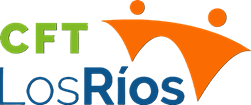
# Taller de Analítica
### Algoritmos de Clasificación
#### Profesor: Diego Miranda Olavarría
#### Data Scientist

In [1]:
import pandas as pd

data = pd.read_csv('iris.csv')

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
data.shape

(150, 6)

In [3]:
data.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [4]:
# Distribución de clases
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
# Preparación de datos para entrenamiento
X = data.drop('Species', axis=1)
y = data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### Árbol de Decisión para Clasificación

In [6]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [7]:
# Predicciones
dt_pred = dt.predict(X_test)
dt_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0

Reporte de clasificación:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Matriz de confusión:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


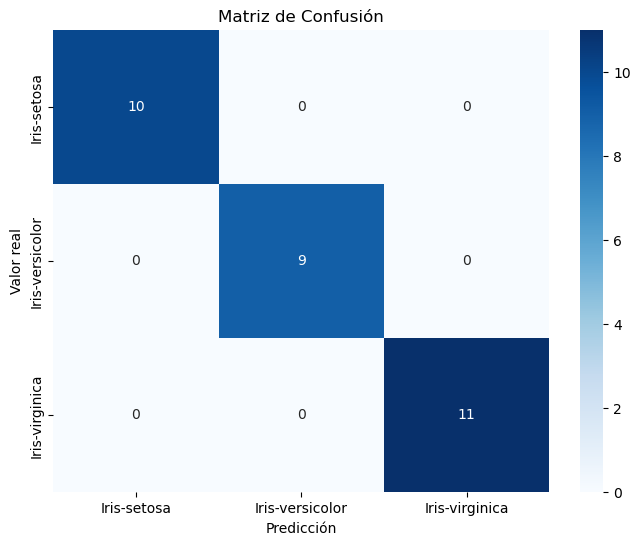

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Predicciones
y_pred = dt.predict(X_test)

# Métricas individuales
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

# Reporte detallado por clase
print("\nReporte de clasificación:\n")
print(classification_report(y_test, y_pred))

# Matriz de confusión (números)
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:\n", cm)

# Graficar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión')
plt.show()


### Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Puedes ajustar el número de árboles
# Entrenar el modelo
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Predicciones
rf_pred = rf.predict(X_test)
rf_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0

Reporte de clasificación:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Matriz de confusión:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


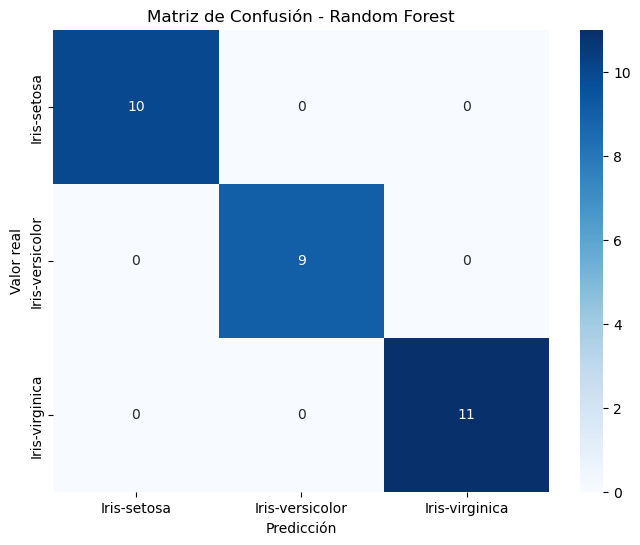

In [11]:
# 1Predicciones
rf_pred = rf.predict(X_test)

# Métricas básicas
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision (macro):", precision_score(y_test, rf_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, rf_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, rf_pred, average='macro'))

# Reporte detallado por clase
print("\nReporte de clasificación:\n")
print(classification_report(y_test, rf_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, rf_pred)
print("\nMatriz de confusión:\n", cm)

# Gráfico de matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión - Random Forest')
plt.show()


### Escalado de Datos

In [12]:
from sklearn.preprocessing import StandardScaler
# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Regresión Logística

In [13]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo de Regresión Logística
lr = LogisticRegression(random_state=42)
# Entrenar el modelo
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [14]:
# Hacer predicciones
lr_pred = lr.predict(X_test_scaled)
lr_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0

Reporte de clasificación:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Matriz de confusión:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


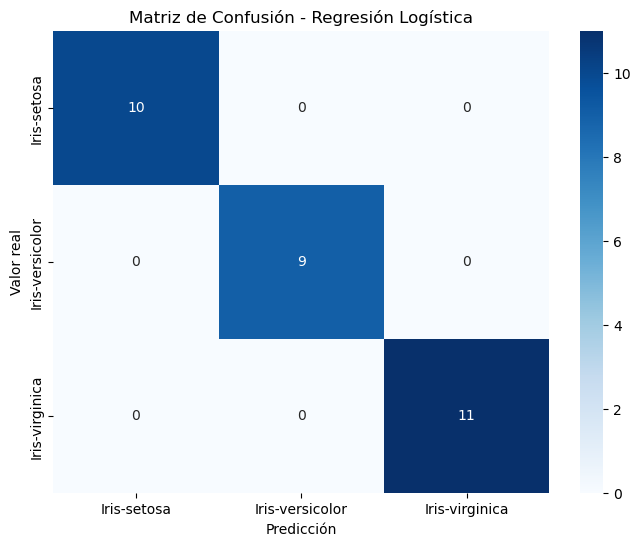

In [15]:
# Predicciones
lr_pred = lr.predict(X_test_scaled)

# Métricas básicas
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Precision (macro):", precision_score(y_test, lr_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, lr_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, lr_pred, average='macro'))

# Reporte detallado
print("\nReporte de clasificación:\n")
print(classification_report(y_test, lr_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, lr_pred)
print("\nMatriz de confusión:\n", cm)

# Graficar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()


### KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Crear el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Puedes cambiar el número de vecinos aquí
# Entrenar el modelo
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [17]:
# Predicciones
knn_pred = knn.predict(X_test_scaled)
knn_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0

Reporte de clasificación:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Matriz de confusión:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


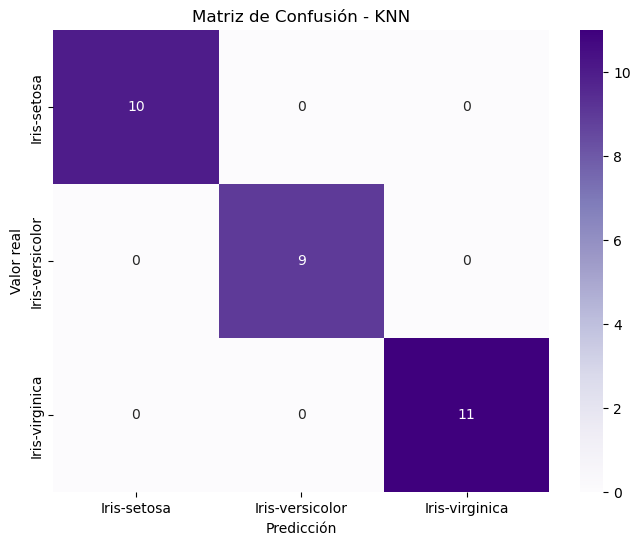

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predicciones
knn_pred = knn.predict(X_test_scaled)

# Métricas básicas
print("Accuracy:", accuracy_score(y_test, knn_pred))
print("Precision (macro):", precision_score(y_test, knn_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, knn_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, knn_pred, average='macro'))

# Reporte completo
print("\nReporte de clasificación:\n")
print(classification_report(y_test, knn_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, knn_pred)
print("\nMatriz de confusión:\n", cm)

# Graficar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión - KNN')
plt.show()


### Naibe Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB

# Crear el modelo Naive Bayes
nb = GaussianNB()
# Entrenar el modelo
nb.fit(X_train_scaled, y_train)

GaussianNB()

In [20]:
# Predicciones
nb_pred = nb.predict(X_test_scaled)
nb_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype='<U15')

Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0

Reporte de clasificación:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Matriz de confusión:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


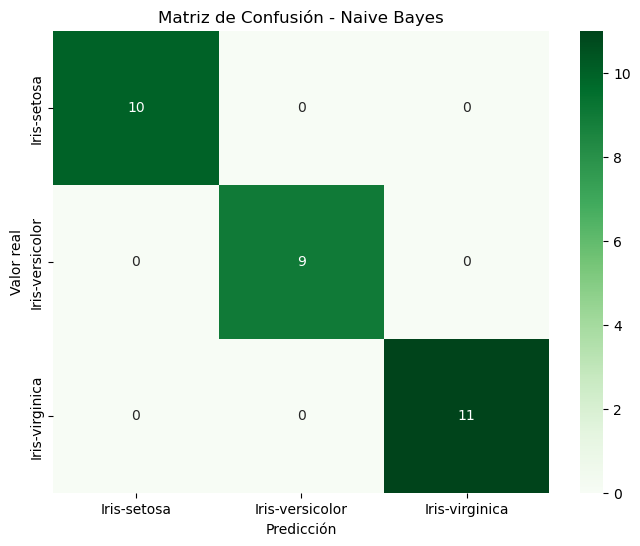

In [21]:
# Predicciones
nb_pred = nb.predict(X_test_scaled)

# Métricas básicas
print("Accuracy:", accuracy_score(y_test, nb_pred))
print("Precision (macro):", precision_score(y_test, nb_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, nb_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, nb_pred, average='macro'))

# Reporte completo
print("\nReporte de clasificación:\n")
print(classification_report(y_test, nb_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, nb_pred)
print("\nMatriz de confusión:\n", cm)

# Graficar matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión - Naive Bayes')
plt.show()


### Support Vector Machine (SVM)

In [22]:
from sklearn.svm import SVC

# Crear el modelo SVM
svm = SVC(kernel='linear')  # Puedes cambiar el kernel aquí, por ejemplo a 'rbf', 'poly', etc.
# Entrenar el modelo
svm.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [23]:
# Predicciones
svm_pred = svm.predict(X_test_scaled)
svm_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0

Reporte de clasificación:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Matriz de confusión:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


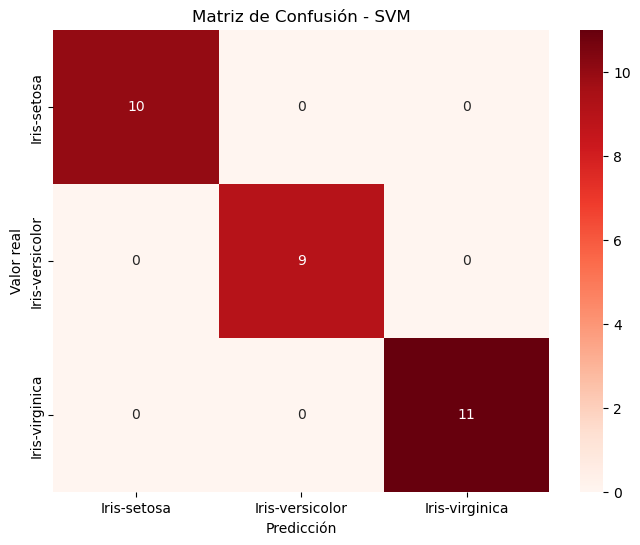

In [24]:
# Predicciones
svm_pred = svm.predict(X_test_scaled)

# Métricas básicas
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Precision (macro):", precision_score(y_test, svm_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, svm_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, svm_pred, average='macro'))

# Reporte detallado
print("\nReporte de clasificación:\n")
print(classification_report(y_test, svm_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, svm_pred)
print("\nMatriz de confusión:\n", cm)

# Gráfico de la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión - SVM')
plt.show()


### Multilayer Perceptron

In [25]:
from sklearn.neural_network import MLPClassifier

# Crear el modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=42)
# Entrenar el modelo
mlp.fit(X_train_scaled, y_train)

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=42)

In [26]:
# Hacer predicciones
mlp_pred = mlp.predict(X_test_scaled)
mlp_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype='<U15')

Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0

Reporte de clasificación:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Matriz de confusión:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


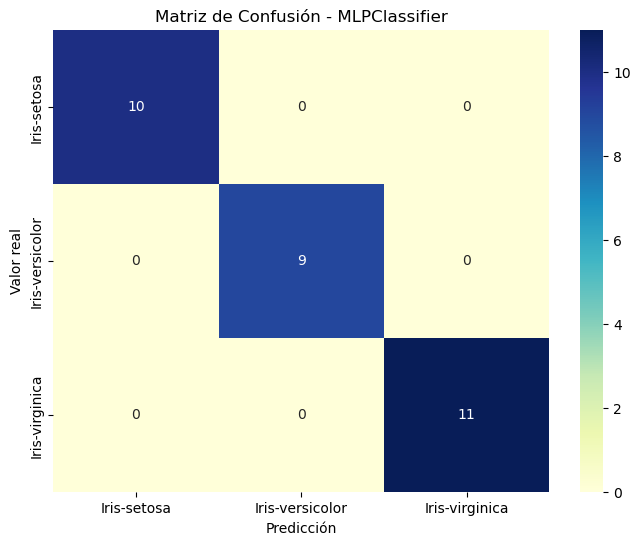

In [27]:
# Predicciones
mlp_pred = mlp.predict(X_test_scaled)

# Métricas básicas
print("Accuracy:", accuracy_score(y_test, mlp_pred))
print("Precision (macro):", precision_score(y_test, mlp_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, mlp_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, mlp_pred, average='macro'))

# Reporte por clase
print("\nReporte de clasificación:\n")
print(classification_report(y_test, mlp_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, mlp_pred)
print("\nMatriz de confusión:\n", cm)

# Graficar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión - MLPClassifier')
plt.show()


### XGBoost

In [28]:
from xgboost import XGBClassifier
# Se debe ocupar LabelEncoder para transformar a numéricas
from sklearn.preprocessing import LabelEncoder 

# Codificamos nuestras variables categóricas
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [29]:
# Predicciones
xgb_pred = xgb.predict(X_test)
xgb_pred = encoder.inverse_transform(xgb_pred)
xgb_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0

Reporte de clasificación:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Matriz de confusión:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


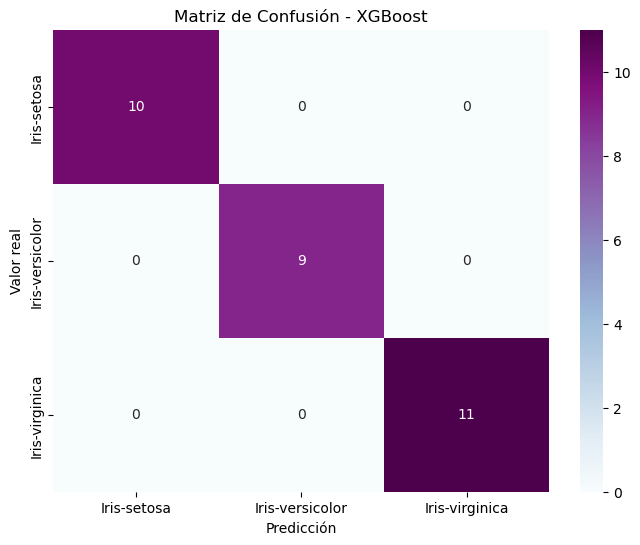

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Predicciones
xgb_pred = xgb.predict(X_test)
xgb_pred = encoder.inverse_transform(xgb_pred)  # volver a etiquetas originales

# 2. Métricas principales
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Precision (macro):", precision_score(y_test, xgb_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, xgb_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, xgb_pred, average='macro'))

# 3. Reporte detallado
print("\nReporte de clasificación:\n")
print(classification_report(y_test, xgb_pred))

# 4. Matriz de confusión
cm = confusion_matrix(y_test, xgb_pred)
print("\nMatriz de confusión:\n", cm)

# 5. Graficar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión - XGBoost')
plt.show()


### Comparación de Métricas

In [31]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from tabulate import tabulate

def specificity_per_class(y_true, y_pred):
    # Obtener la matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    specificity_scores = []
    for i in range(len(cm)):
        tn = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
        fp = np.sum(cm[:, i]) - cm[i, i]
        specificity_scores.append(tn / (tn + fp) if (tn + fp) > 0 else 0)
    return np.mean(specificity_scores)

# Predicciones
predictions = {
    'Logistic Regression': lr_pred,
    'KNN': knn_pred,
    'Decision Tree': dt_pred,
    'Random Forest': rf_pred,
    'Naibe Bayes': nb_pred,
    'SVM': svm_pred,
    'MLP': mlp_pred,
    'XGBoost': xgb_pred
}

# Calculamos las métricas para cada modelo
metrics_summary = []

for name, preds in predictions.items():
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds, average='macro')
    recall = recall_score(y_test, preds, average='macro')
    f1 = f1_score(y_test, preds, average='macro')
    specificity = specificity_per_class(y_test, preds)
    
    metrics_summary.append([name, accuracy, precision, recall, specificity, f1])

# Creamos una tabla con tabulate
headers = ['Model', 'Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 Score']
print(tabulate(metrics_summary, headers=headers, tablefmt='grid'))

+---------------------+------------+-------------+----------+---------------+------------+
| Model               |   Accuracy |   Precision |   Recall |   Specificity |   F1 Score |
+=====================+============+=============+==========+===============+============+
| Logistic Regression |          1 |           1 |        1 |             1 |          1 |
+---------------------+------------+-------------+----------+---------------+------------+
| KNN                 |          1 |           1 |        1 |             1 |          1 |
+---------------------+------------+-------------+----------+---------------+------------+
| Decision Tree       |          1 |           1 |        1 |             1 |          1 |
+---------------------+------------+-------------+----------+---------------+------------+
| Random Forest       |          1 |           1 |        1 |             1 |          1 |
+---------------------+------------+-------------+----------+---------------+------------+

* Sensibilidad: La sensibilidad mide la proporción de positivos reales que se identificaron correctamente. Es una medida de la capacidad del modelo para detectar todas las instancias positivas.
* Especificidad: La especificidad mide la proporción de negativos reales que se identificaron correctamente.
* Precisión: La precisión mide la proporción de predicciones positivas que fueron correctas.
* Medida F1: La medida F1 es la media armónica de la precisión y la sensibilidad. Combina ambas en una sola métrica al considerar tanto los falsos positivos como los falsos negativos.